<a href="https://colab.research.google.com/github/kotharisanjana/CMPE255_DataMining_Fall2022/blob/main/Pycaret_MulticlassClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Installations

In [ ]:
!pip install pycaret --user
!pip install Jinja2==2.11.3
!pip install markupsafe==2.0.1
!pip install opendatasets
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 320 kB 5.4 MB/s 
     |████████████████████████████████| 10.4 MB 28.9 MB/s 
     |████████████████████████████████| 1.7 MB 41.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 6.8 MB 48.0 MB/s 
     |████████████████████████████████| 88 kB 7.3 MB/s 
     |████████████████████████████████| 17.0 MB 37.8 MB/s 
     |████████████████████████████████| 268 kB 61.9 MB/s 
     |████████████████████████████████| 636 kB 31.1 MB/s 
     |████████████████████████████████| 167 kB 52.3 MB/s 
     |████████████████████████████████| 25.9 MB 1.2 MB/s 
     |████████████████████████████████| 3.3 MB 44.4 MB/s 
     |████████████████████████████████| 1.3 MB 69.4 MB/s 
     |███████████████████████████████

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.1 MB 5.2 MB/s 
     |████████████████████████████████| 112 kB 43.5 MB/s 
     |████████████████████████████████| 2.3 MB 43.6 MB/s 
     |████████████████████████████████| 55 kB 3.5 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 84 kB 3.6 MB/s 
     |████████████████████████████████| 57 kB 4.9 MB/s 
     |████████████████████████████████| 54 kB 3.1 MB/s 
     |████████████████████████████████| 270 kB 62.9 MB/s 
     |████████████████████████████████| 212 kB 63.4 MB/s 
     |█████████████████████████████

## Kaggle API credentials

In [ ]:
!gdown 12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD

Downloading...
From: https://drive.google.com/uc?id=12ixZGdrcwr_c4nVnjVEonFJLiFrbBzsD
To: /content/kaggle.json
100% 65.0/65.0 [00:00<00:00, 102kB/s]


## Imports

In [ ]:
import opendatasets as od
import pandas as pd
from pycaret.classification import *
import pandas_profiling as pp 

## Download dataset

In [ ]:
od.download('https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation')
od.download('https://www.kaggle.com/datasets/abisheksudarshan/customer-segmentation')

100%|██████████| 98.7k/98.7k [00:00<00:00, 33.5MB/s]


Skipping, found downloaded files in "./customer-segmentation" (use force=True to force download)


In [ ]:
train = pd.read_csv('/content/customer-segmentation/train.csv')
test = pd.read_csv('/content/customer-segmentation/test.csv')

## EDA and data transformation

In [ ]:
pp.ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
train.drop(['ID'], inplace = True, axis = 1)
test.drop(['ID'], inplace = True, axis = 1)

## Set up environment

In [ ]:
classification = setup(train, \
                       session_id = 1, \
                       target = 'Segmentation', \
                       categorical_imputation = 'mode', \
                       ordinal_features = {'Spending_Score' : ['Low', 'Average', 'High']}, \
                       numeric_features = ['Work_Experience', 'Family_Size'], \
                       numeric_imputation = 'median', \
                       feature_selection = True, \
                       fix_imbalance = True, \
                       ignore_low_variance = True, \
                       fold = 5, \
                       )

,Description,Value
0,session_id,1
1,Target,Segmentation
2,Target Type,Multiclass
3,Label Encoded,"A: 0, B: 1, C: 2, D: 3"
4,Original Data,"(8068, 10)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,True
9,High Cardinality Features,False


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=['Work_Experience',
                                                          'Family_Size'],
                                      target='Segmentation',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='most frequent',
                                fill_value_categorical=None,
                                fil...
                ('fix_perfect', Remove_100(target='Segmentation')),
                ('clean_names', Clean_Col

## Model Selection


In [ ]:
models = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.5265,0.7887,0.5179,0.5218,0.5233,0.3665,0.3670,2.304
lightgbm,Light Gradient Boosting Machine,0.5176,0.7778,0.5090,0.5127,0.5143,0.3544,0.3549,0.654
ada,Ada Boost Classifier,0.5040,0.7521,0.4949,0.4998,0.4997,0.3365,0.3376,0.324
lr,Logistic Regression,0.5004,0.7571,0.4915,0.4947,0.4924,0.3321,0.3346,3.726
ridge,Ridge Classifier,0.4964,0.0000,0.4865,0.4911,0.4781,0.3262,0.3329,0.104
lda,Linear Discriminant Analysis,0.4907,0.7554,0.4837,0.4961,0.4860,0.3203,0.3239,0.082
rf,Random Forest Classifier,0.4847,0.7466,0.4765,0.4816,0.4826,0.3108,0.3110,1.032
qda,Quadratic Discriminant Analysis,0.4783,0.7358,0.4713,0.4790,0.4750,0.3036,0.3053,0.074
et,Extra Trees Classifier,0.4656,0.7156,0.4577,0.4647,0.4648,0.2857,0.2858,1.020
nb,Naive Bayes,0.4640,0.7283,0.4551,0.4615,0.4534,0.2838,0.2881,0.108


INFO:logs:create_model_container: 14
INFO:logs:master_model_container: 14
INFO:logs:display_container: 2
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:compare_models() succesfully completed......................................


## Model creation

In [ ]:
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5257,0.7779,0.5162,0.5208,0.5225,0.3653,0.3656
1,0.5142,0.7747,0.5061,0.5100,0.5116,0.3501,0.3503
2,0.5049,0.7848,0.4969,0.5008,0.5025,0.3378,0.3380
3,0.5323,0.7756,0.5237,0.5275,0.5290,0.3741,0.3746
4,0.5111,0.7763,0.5019,0.5042,0.5058,0.3449,0.3458
Mean,0.5176,0.7778,0.5090,0.5127,0.5143,0.3544,0.3549
Std,0.0100,0.0036,0.0097,0.0101,0.0100,0.0134,0.0134


INFO:logs:create_model_container: 15
INFO:logs:master_model_container: 15
INFO:logs:display_container: 3
INFO:logs:LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
gbc = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5230,0.7884,0.5133,0.5157,0.5186,0.3616,0.3619
1,0.5336,0.7932,0.5256,0.5307,0.5305,0.3763,0.3772
2,0.5244,0.7987,0.5160,0.5196,0.5214,0.3641,0.3644
3,0.5252,0.7800,0.5165,0.5221,0.5230,0.3648,0.3652
4,0.5261,0.7834,0.5184,0.5208,0.5228,0.3659,0.3662
Mean,0.5265,0.7887,0.5179,0.5218,0.5233,0.3665,0.3670
Std,0.0037,0.0067,0.0042,0.0050,0.0040,0.0051,0.0053


INFO:logs:create_model_container: 16
INFO:logs:master_model_container: 16
INFO:logs:display_container: 4
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5027,0.7483,0.4931,0.4959,0.4962,0.3341,0.3354
1,0.5044,0.7600,0.4965,0.5039,0.5006,0.3376,0.3395
2,0.5102,0.7629,0.5011,0.5064,0.5066,0.3452,0.3461
3,0.4836,0.7415,0.4730,0.4778,0.4798,0.3094,0.3099
4,0.5190,0.7480,0.5105,0.5152,0.5153,0.3564,0.3572
Mean,0.5040,0.7521,0.4949,0.4998,0.4997,0.3365,0.3376
Std,0.0117,0.0080,0.0124,0.0126,0.0119,0.0156,0.0157


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 5
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=1)
INFO:logs:create_model() succesfully completed......................................


## Model tuning

In [ ]:
tuned_lgbm = tune_model(lgbm, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5195,0.7798,0.5097,0.5126,0.5151,0.3567,0.3571
1,0.5363,0.7889,0.5277,0.5321,0.5322,0.3795,0.3805
2,0.5190,0.7900,0.5103,0.5136,0.5157,0.3568,0.3570
3,0.5261,0.7767,0.5169,0.5201,0.5223,0.3658,0.3663
4,0.5332,0.7853,0.5248,0.5286,0.5296,0.3752,0.3758
Mean,0.5268,0.7841,0.5179,0.5214,0.5230,0.3668,0.3673
Std,0.0070,0.0051,0.0073,0.0078,0.0070,0.0093,0.0096


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 6
INFO:logs:LGBMClassifier(bagging_fraction=0.8, bagging_freq=3, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.3, max_depth=-1,
               min_child_samples=26, min_child_weight=0.001, min_split_gain=0.8,
               n_estimators=230, n_jobs=-1, num_leaves=100, objective=None,
               random_state=1, reg_alpha=0.005, reg_lambda=4, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


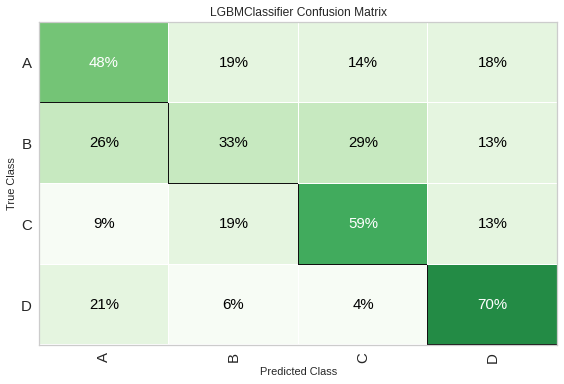

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lgbm, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

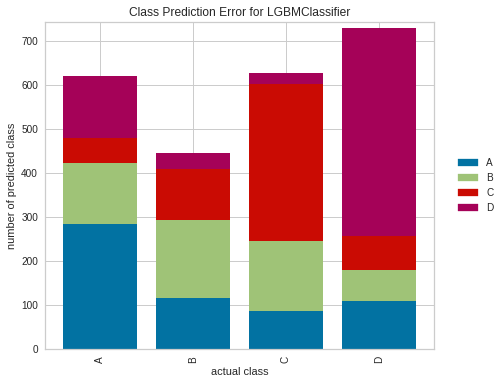

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lgbm, plot = 'error')

In [ ]:
tuned_gbc = tune_model(gbc, optimize = 'Accuracy')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5301,0.7852,0.5202,0.5209,0.5236,0.3708,0.3717
1,0.5451,0.7922,0.5368,0.5412,0.5405,0.3912,0.3926
2,0.5332,0.7976,0.5241,0.5283,0.5276,0.3753,0.3768
3,0.5252,0.7758,0.5156,0.5209,0.5218,0.3648,0.3654
4,0.5288,0.7802,0.5193,0.5210,0.5227,0.3689,0.3699
Mean,0.5325,0.7862,0.5232,0.5265,0.5272,0.3742,0.3753
Std,0.0068,0.0079,0.0073,0.0079,0.0069,0.0092,0.0094


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 7
INFO:logs:GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1e-07, loss='deviance', max_depth=10,
                           max_features='log2', max_leaf_nodes=None,
                           min_impurity_decrease=0.02, min_impurity_split=None,
                           min_samples_leaf=5, min_samples_split=10,
                           min_weight_fraction_leaf=0.0, n_estimators=180,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1, subsample=0.25, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
INFO:logs:tune_model() succesfully completed......................................


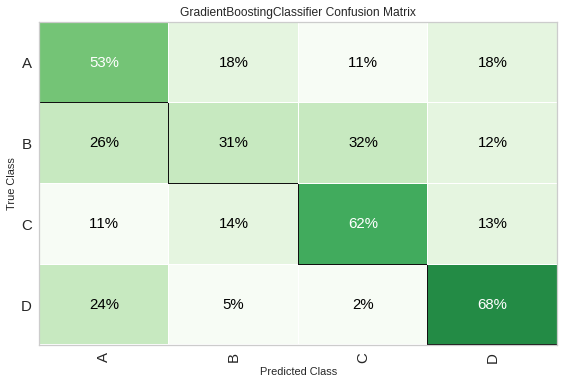

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_gbc, plot = 'confusion_matrix', plot_kwargs = {'percent' : True})

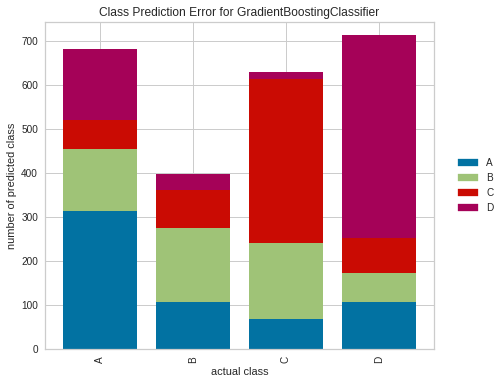

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_gbc, plot = 'error')

## Ensemble

In [ ]:
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4602,0.6492,0.4537,0.4642,0.4619,0.2793,0.2794
1,0.4204,0.6193,0.4136,0.4254,0.4223,0.2262,0.2264
2,0.4181,0.6207,0.4120,0.4217,0.4197,0.2231,0.2232
3,0.4322,0.6278,0.4263,0.4360,0.4340,0.2421,0.2421
4,0.4464,0.6362,0.4399,0.4485,0.4473,0.2607,0.2608
Mean,0.4355,0.6306,0.4291,0.4392,0.4370,0.2463,0.2464
Std,0.0159,0.0110,0.0159,0.0156,0.0158,0.0212,0.0212


INFO:logs:create_model_container: 20
INFO:logs:master_model_container: 20
INFO:logs:display_container: 8
INFO:logs:DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='best')
INFO:logs:create_model() succesfully completed......................................


In [ ]:
bagged_dt = ensemble_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4805,0.7284,0.4712,0.4776,0.4786,0.3053,0.3054
1,0.4487,0.7158,0.4419,0.4577,0.4513,0.2641,0.2649
2,0.4606,0.7247,0.4549,0.4668,0.4630,0.2802,0.2804
3,0.4730,0.7202,0.4667,0.4763,0.4744,0.2963,0.2964
4,0.4756,0.7204,0.4680,0.4761,0.4754,0.2993,0.2995
Mean,0.4677,0.7219,0.4605,0.4709,0.4685,0.2890,0.2894
Std,0.0116,0.0043,0.0108,0.0077,0.0101,0.0150,0.0148


INFO:logs:create_model_container: 21
INFO:logs:master_model_container: 21
INFO:logs:display_container: 9
INFO:logs:BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                      

In [ ]:
boosted_dt = ensemble_model(dt, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4832,0.7205,0.4743,0.4794,0.4810,0.3089,0.3090
1,0.4434,0.6894,0.4356,0.4464,0.4447,0.2566,0.2567
2,0.4508,0.6949,0.4441,0.4542,0.4522,0.2669,0.2671
3,0.4712,0.7028,0.4640,0.4714,0.4712,0.2935,0.2935
4,0.4624,0.7012,0.4558,0.4638,0.4630,0.2819,0.2820
Mean,0.4622,0.7018,0.4548,0.4631,0.4624,0.2816,0.2817
Std,0.0142,0.0105,0.0138,0.0118,0.0130,0.0186,0.0186


INFO:logs:create_model_container: 22
INFO:logs:master_model_container: 22
INFO:logs:display_container: 10
INFO:logs:AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fract

In [ ]:
blend_hard = blend_models(estimator_list = [lgbm, gbc, ada], method = 'hard')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5283,0.0,0.5185,0.5211,0.5236,0.3686,0.3691
1,0.5345,0.0,0.5260,0.5324,0.5296,0.3774,0.3794
2,0.5173,0.0,0.5086,0.5131,0.5138,0.3544,0.3550
3,0.5235,0.0,0.5142,0.5218,0.5206,0.3624,0.3634
4,0.5244,0.0,0.5162,0.5210,0.5210,0.3633,0.3641
Mean,0.5256,0.0,0.5167,0.5219,0.5217,0.3652,0.3662
Std,0.0057,0.0,0.0057,0.0062,0.0051,0.0076,0.0080


INFO:logs:create_model_container: 23
INFO:logs:master_model_container: 23
INFO:logs:display_container: 11
INFO:logs:VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=1, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='

## Prediction on test set


In [ ]:
predict_model(blend_hard, data = test)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=VotingClassifier(estimators=[('lightgbm',
                              LGBMClassifier(boosting_type='gbdt',
                                             class_weight=None,
                                             colsample_bytree=1.0,
                                             importance_type='split',
                                             learning_rate=0.1, max_depth=-1,
                                             min_child_samples=20,
                                             min_child_weight=0.001,
                                             min_split_gain=0.0,
                                             n_estimators=100, n_jobs=-1,
                                             num_leaves=31, objective=None,
                                             random_state=1, reg_alpha=0.0,
                                             reg_lambda=0.0, silent='warn',
                                    

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Label
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,A
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,C
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,B
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,C
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,D
...,...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,D
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,A
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,B


## Gradio

In [ ]:
create_app(blend_hard)

INFO:logs:Initializing get_config()
INFO:logs:get_config(variable=data_before_preprocess)
INFO:logs:Global variable: data_before_preprocess returned as       Gender Ever_Married  Age Graduated     Profession  Work_Experience  \
0       Male           No   22        No     Healthcare              1.0   
1     Female          Yes   38       Yes       Engineer              NaN   
2     Female          Yes   67       Yes       Engineer              1.0   
3       Male          Yes   67       Yes         Lawyer              0.0   
4     Female          Yes   40       Yes  Entertainment              NaN   
...      ...          ...  ...       ...            ...              ...   
8063    Male           No   22        No            NaN              0.0   
8064    Male           No   35        No      Executive              3.0   
8065  Female           No   33       Yes     Healthcare              1.0   
8066  Female           No   27       Yes     Healthcare              1.0   
8067    Male

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://15579.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f2b24bc8750>,
 'http://127.0.0.1:7860/',
 'https://15579.gradio.app')